## Data Preparation

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

pd.set_option("display.max_rows", 500) #display the rows upto 500th row

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8537,8555,8581,8581,8581,8581,8590,8590,8625,8625
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9313453,9313453,9313453,9341492,9341492,9341492,9341492,9341492,9341492,9341492
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,423044,423044,423044,423044,423104,423104,423104,423104,423104,423104
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,144597,145457,146264,147096,147942,148996,150123,151113,152199,153012


In [4]:
pd_raw.columns[4:] # to get all the date columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/16/22', '6/17/22', '6/18/22', '6/19/22', '6/20/22', '6/21/22',
       '6/22/22', '6/23/22', '6/24/22', '6/25/22'],
      dtype='object', length=886)

In [5]:
time_idx=pd_raw.columns[4:] # storing all the columns and its values in a new variable

In [6]:
df_plot = pd.DataFrame({'date':time_idx}) # creating a dataset with of date values using a dictionary/ coverting columns to rows
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [8]:
pd_raw[pd_raw['Country/Region'] == 'US'].iloc[:,4:].sum(axis=0)
# extracting and totaling the no. of cases for each day in the US

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
6/21/22    86452232
6/22/22    86636306
6/23/22    86757621
6/24/22    86909716
6/25/22    86949088
Length: 886, dtype: int64

In [9]:
country_list = ['Italy','US','Spain','Germany','India']

In [10]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:,4::].sum(axis=0))
    # totaling the no. of cases for each day in all the countries in the list
df_plot

,date,Italy,US,Spain,Germany,India
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0
...,...,...,...,...,...,...
881,6/21/22,17959329,86452232,12613634,27454225,43331645
882,6/22/22,18014202,86636306,12613634,27573585,43344958
883,6/23/22,18071634,86757621,12613634,27681775,43362294
884,6/24/22,18128044,86909716,12681820,27771111,43378234


<AxesSubplot:xlabel='date'>

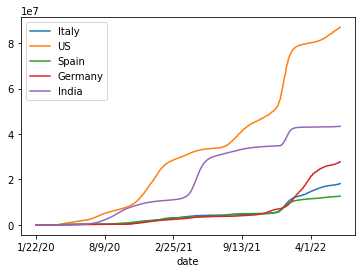

In [11]:
df_plot.set_index('date').plot()

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,India
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


In [13]:
time_idx = [datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_str = [each.strftime('%Y-%m-%d') for each in time_idx]

In [14]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_plot.head()

,date,Italy,US,Spain,Germany,India
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [16]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep = ';', index = False) # generating the csv file

## Relational data model


In [17]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [18]:
pd_data_base = pd_raw.rename(columns = {'Country/Region': 'country',
                                        'Province/State': 'state'}) # renaming columns 

In [19]:
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis= 1) # dropping the unnecessary columns
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [20]:
test_pd = pd_data_base.set_index(['state', 'country']).T # extracting the columns for multi-indexing

In [21]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [22]:
pd_relational_test = test_pd.stack(level= [0,1]).reset_index() # inverting the rows to columns and vice versa
pd_relational_test

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
252505,6/25/22,Western Australia,Australia,884323.0
252506,6/25/22,Xinjiang,China,1008.0
252507,6/25/22,Yukon,Canada,4453.0
252508,6/25/22,Yunnan,China,2173.0


In [23]:
pd_relational_model = pd_relational_test.rename(columns = {'level_0': 'date',
                                                              0: 'confirmed'}) # remaning the columns

In [24]:
pd_relational_model

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
252505,6/25/22,Western Australia,Australia,884323.0
252506,6/25/22,Xinjiang,China,1008.0
252507,6/25/22,Yukon,Canada,4453.0
252508,6/25/22,Yunnan,China,2173.0


In [25]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [26]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [27]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [28]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv', sep = ';',index=False)

# Data Understanding EDA open

# Group-by apply

In [29]:
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv', sep = ';', parse_dates = [0])
pd_JH_data = pd_JH_data.sort_values('date', ascending = True).reset_index(drop = True).copy()
pd_JH_data

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,Kosovo,0.0
2,2020-01-22,no,Kuwait,0.0
3,2020-01-22,no,Kyrgyzstan,0.0
4,2020-01-22,no,Laos,0.0
...,...,...,...,...
252505,2022-06-25,no,Andorra,43774.0
252506,2022-06-25,no,Algeria,266030.0
252507,2022-06-25,no,Albania,278793.0
252508,2022-06-25,no,Argentina,9341492.0


In [30]:
test_data = pd_JH_data[((pd_JH_data['country'] == 'US')|
                      (pd_JH_data['country'] == 'Germany'))&
                     ((pd_JH_data['date']> '2020-03-20'))]

In [31]:
test_data

,date,state,country,confirmed
16854,2020-03-21,no,Germany,16662.0
16904,2020-03-21,no,US,26025.0
17139,2020-03-22,no,Germany,18610.0
17189,2020-03-22,no,US,34944.0
17424,2020-03-23,no,Germany,22672.0
...,...,...,...,...
251751,2022-06-23,no,US,86757621.0
251980,2022-06-24,no,Germany,27771111.0
252029,2022-06-24,no,US,86909716.0
252264,2022-06-25,no,Germany,27771112.0


In [32]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2022-06-25,no,27771112.0
US,2022-06-25,no,86949088.0


In [33]:
#%load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept = True)

def get_doubling_time_via_regression(in_array):
    '''Using a linear regression to approximate the doubling rate'''
    
    
#     y = np.array(in_array['confirmed'])
#     X = np.arange(len(y)).reshape(-1,1)
    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1,1)
    
    assert len(in_array) == 3
    reg.fit(X,y)
    intercept = reg.intercept_
    slope = reg.coef_
    
    return intercept/slope


# if __name__ == '__main__':
#     test_data = np.array([2,4,6])
#     result = get_doubling_time_via_regression(test_data2)
#     print('The test slope is:' + str(result))
    

    


In [34]:
test_data.groupby(['state', 'country']).agg(np.max)

date   confirmed
state country                       
no    Germany 2022-06-25  27771112.0
      US      2022-06-25  86949088.0

In [35]:
#test_data.groupby(['state', 'country']).apply(get_doubling_time_via_regression)

In [36]:
def rolling_reg(df_input,col='confirmed'):
    '''input has to be a data frame'''
    '''return is a single series (mandatory for group by apply)'''
    
    days_back = 3
    result = df_input[col].rolling(
                window = days_back,
                min_periods = days_back).apply(get_doubling_time_via_regression,raw = False)
    return result

In [37]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country        
no     Germany  16854            NaN
                17139            NaN
                17424       6.427510
                17709       5.190573
                17994       6.129400
                             ...    
       US       251174    837.640187
                251473    509.761209
                251751    567.246275
                252029    634.708906
                252326    907.437226
Name: confirmed, Length: 1654, dtype: float64

In [38]:
test_data

,date,state,country,confirmed
16854,2020-03-21,no,Germany,16662.0
16904,2020-03-21,no,US,26025.0
17139,2020-03-22,no,Germany,18610.0
17189,2020-03-22,no,US,34944.0
17424,2020-03-23,no,Germany,22672.0
...,...,...,...,...
251751,2022-06-23,no,US,86757621.0
251980,2022-06-24,no,Germany,27771111.0
252029,2022-06-24,no,US,86909716.0
252264,2022-06-25,no,Germany,27771112.0


In [39]:
pd_DR_result = pd_JH_data[['state', 'country', 'confirmed']].groupby(['state', 'country']).apply(rolling_reg, 'confirmed').reset_index()
pd_DR_result

,state,country,level_2,confirmed
0,Alberta,Canada,0,NaN
1,Alberta,Canada,499,NaN
2,Alberta,Canada,762,NaN
3,Alberta,Canada,1069,NaN
4,Alberta,Canada,1333,NaN
...,...,...,...,...
252505,no,Zimbabwe,251226,4319.497175
252506,no,Zimbabwe,251439,2338.834862
252507,no,Zimbabwe,251746,2350.549923
252508,no,Zimbabwe,251988,1962.805128


In [43]:
pd_DR_result = pd_DR_result.rename(columns = {'confirmed': 'confirmed_DR',
                              'level_2' : 'index'})

pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,0,NaN
1,Alberta,Canada,499,NaN
2,Alberta,Canada,762,NaN
3,Alberta,Canada,1069,NaN
4,Alberta,Canada,1333,NaN


In [44]:
pd_JH_data = pd_JH_data.reset_index()
pd_JH_data.head()

,level_0,index,date,state,country,confirmed
0,0,0,2020-01-22,Alberta,Canada,0.0
1,1,1,2020-01-22,no,Kosovo,0.0
2,2,2,2020-01-22,no,Kuwait,0.0
3,3,3,2020-01-22,no,Kyrgyzstan,0.0
4,4,4,2020-01-22,no,Laos,0.0


In [45]:
pd_result_large = pd.merge(pd_JH_data, pd_DR_result[['index', 'confirmed_DR']], on = ['index'], how = 'left')
pd_result_large

,level_0,index,date,state,country,confirmed,confirmed_DR
0,0,0,2020-01-22,Alberta,Canada,0.0,NaN
1,1,1,2020-01-22,no,Kosovo,0.0,NaN
2,2,2,2020-01-22,no,Kuwait,0.0,NaN
3,3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN
4,4,4,2020-01-22,no,Laos,0.0,NaN
...,...,...,...,...,...,...,...
252505,252505,252505,2022-06-25,no,Andorra,43774.0,inf
252506,252506,252506,2022-06-25,no,Algeria,266030.0,3.546978e+04
252507,252507,252507,2022-06-25,no,Albania,278793.0,9.570538e+02
252508,252508,252508,2022-06-25,no,Argentina,9341492.0,inf


# Filtering the data with group-by apply

In [46]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [47]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [48]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_large.head()


,level_0,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,0,2020-01-22,Alberta,Canada,0.0,NaN,0.0
1,1,1,2020-01-22,no,Kosovo,0.0,NaN,0.0
2,2,2,2020-01-22,no,Kuwait,0.0,NaN,0.0
3,3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN,0.0
4,4,4,2020-01-22,no,Laos,0.0,NaN,0.0


# Filtered doubling rate

In [49]:
pd_filtered_doubling=pd_result_large[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR','level_2':'index'})

pd_filtered_doubling.tail()

,state,country,index,confirmed_filtered_DR
252505,no,Zimbabwe,251226,3753.702504
252506,no,Zimbabwe,251439,2861.453797
252507,no,Zimbabwe,251746,2586.681542
252508,no,Zimbabwe,251988,2556.585170
252509,no,Zimbabwe,252509,2454.311538


In [50]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_large.tail()

,level_0,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
252505,252505,252505,2022-06-25,no,Andorra,43774.0,inf,43839.0,6.734462e+02
252506,252506,252506,2022-06-25,no,Algeria,266030.0,3.546978e+04,266032.4,2.860463e+04
252507,252507,252507,2022-06-25,no,Albania,278793.0,9.570538e+02,278787.0,9.862061e+02
252508,252508,252508,2022-06-25,no,Argentina,9341492.0,inf,9341492.0,-1.003035e+16
252509,252509,252509,2022-06-25,no,Zimbabwe,255309.0,2.950882e+03,255352.4,2.454312e+03


In [51]:
mask=pd_result_large['confirmed']>100
pd_result_large['confirmed_filtered_DR']=pd_result_large['confirmed_filtered_DR'].where(mask, other=np.NaN)

In [52]:
pd_result_large[pd_result_large['country']=='Germany'].tail()

,level_0,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
251124,251124,251124,2022-06-21,no,Germany,27454225.0,225.591693,27451294.8,323.651057
251409,251409,251409,2022-06-22,no,Germany,27573585.0,230.135693,27563137.8,265.017956
251695,251695,251695,2022-06-23,no,Germany,27681775.0,242.319153,27650361.6,276.841054
251980,251980,251980,2022-06-24,no,Germany,27771111.0,280.221240,27733491.6,324.606754
252264,252264,252264,2022-06-25,no,Germany,27771112.0,621.049121,27816621.6,333.615922


In [53]:
pd_result_large.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)